In [124]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [125]:
df = pd.read_csv("date_inghetata.csv")
df

,temperatura,vanzari,luna,zi_saptamana
0,8,25,ianuarie,luni
1,10,35,ianuarie,marti
2,12,45,ianuarie,miercuri
3,15,55,ianuarie,joi
4,18,75,ianuarie,vineri
...,...,...,...,...
233,33,168,mai,miercuri
234,35,182,mai,joi
235,37,195,mai,vineri
236,39,208,mai,sambata


In [126]:
# Dataset-ul conține temperatura zilnică (°C) și vânzările de înghețată (unități) pentru o gelaterie din București pe parcursul unui an întreg, cu peste 200 de înregistrări.

temperatura =  df.temperatura  # echivalent cu df["temperatura"]
type(temperatura)

pandas.core.series.Series

In [127]:
temperatura =  df[["temperatura"]]
type(temperatura)
vanzari =  df[["vanzari"]]

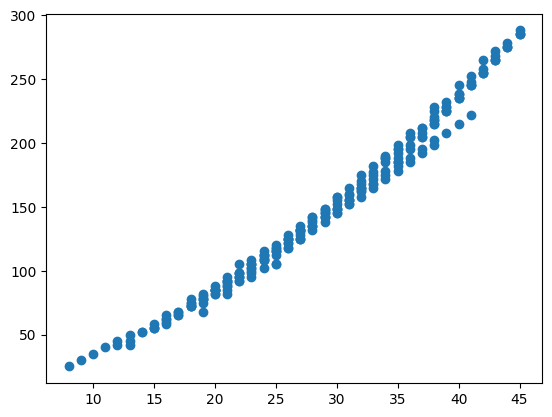

In [128]:
# 1. Trebuie creat un scatter plot pentru a vizualiza relația dintre temperatură și vânzări.
plt.scatter(temperatura, vanzari)
plt.show()

In [129]:
# 2. Trebuie să separi datele în variabila independentă (X) și variabila dependentă (y). Variabila independentă este temperatura, iar variabila dependentă este numărul de vânzări.
x, y = temperatura, vanzari

In [130]:
# 3. Împarte datele în seturi de antrenament și testare. Vei folosi 78% din date pentru antrenament și 22% pentru testare.
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.22)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((185, 1), (53, 1), (185, 1), (53, 1))

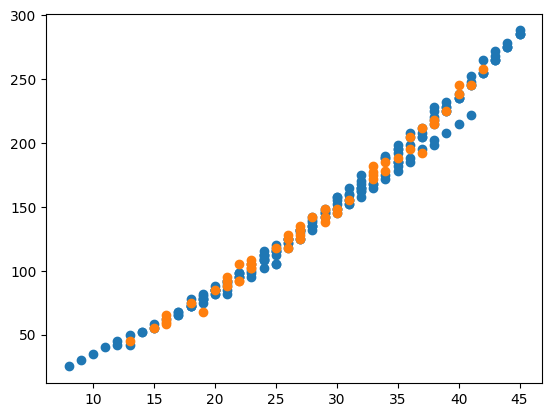

In [131]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

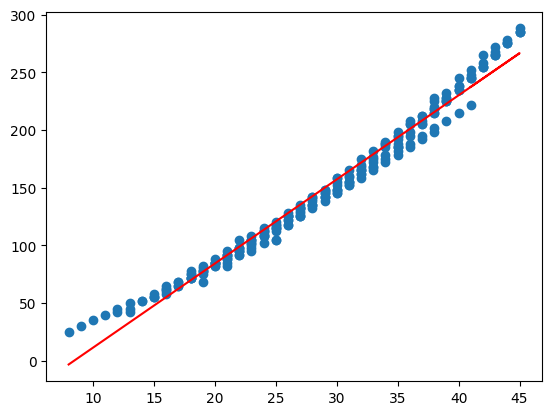

In [132]:
# 4. Creează un model de regresie și antrenează-l pe datele de antrenament.

model = LinearRegression()
model.fit(x_train, y_train)

plt.scatter(temperatura, vanzari)
plt.plot(temperatura, model.coef_ * temperatura + model.intercept_, c="red")
plt.show()

In [135]:
# 5. Folosește modelul pentru a prezice vânzările pentru temperaturi noi pe care nu le-ai văzut înainte.
y_prezis = model.predict(x_test)
pd.DataFrame({ "prezis": y_prezis.flatten(),  "real": y_test["vanzari"],}).head(5)

,prezis,real
180,135.271494,132
134,179.032567,175
75,230.087152,245
68,208.206615,212
84,186.326079,178


In [143]:
linear_score =  model.score(x_test, y_test)
linear_score

0.9847235588948949

In [137]:
# 6. Compară scorul cu a unui alt model
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

In [138]:
knn_model = KNeighborsRegressor(n_neighbors=3)
tree_model = DecisionTreeRegressor()

In [139]:
knn_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [140]:
knn_score = knn_model.score(x_test, y_test)
tree_score = tree_model.score(x_test, y_test)

In [141]:
knn_score

0.9902150371218631

In [142]:
tree_score

0.9895715074934512

In [144]:
linear_score

0.9847235588948949